In [1]:
#Import required libraries
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('Solarize_Light2')
%matplotlib qt

In [2]:
#Importing given data from excel
data=pd.read_csv("data.csv")

#Finding the Loan type for the given Loan Size
data['Loan_Type(phi)'] = data['Interest'].apply(lambda x: 'M' if (x<=0.028 and x>=0.021) else ('P'  if (x>=0.0599 and x<=0.0609) else('A' if (x>=0.0339 and x<=0.0399) else "")))


In [3]:
#Initializing parameters for Genetic ALgorithm

max_iter=60         # maximum iteration for the algo to run
n=60                 # population size
N=10                 # Number of customers
prob_cross=0.8       # probability of crossover
prob_mut=0.006       # probability of mutation

#Given predefined loan characteristics
D=60                 # Financial institutions's Deposit
K=0.15               # Reserve Ratio 
delta=0.0025         # Pre-determined Institutional Cost
rT=0.01              # Customer Transaction Rate
rD=0.009             # Deposit Rate 

In [4]:
#Generating initial population

initial_population=[]

while(len(initial_population) < n):
    x = [random.randint(0, 1) for i in range(N)]   # Genrating intial binary string 
    L=0
    for i in range(0,10):
        if(x[i]==1):
            L+=data.Loan_Size[i]                   # Calculation sum of Loan
            
        
    if L<=((1-K)*D):                              # Checking the feasibility
         initial_population.append(x)
                          
    else : 
         continue


In [5]:
#Function to calculate fitness value of given population
def calculate_fitness_value(population):

    fitness=[]
    
    for i in population:
        
        # initialising variables
        loan_revenue_nu=0
        loan_cost_mu=0
        total_transaction_cost_omega=0
        demand_deposit_beta=0
        sum_lambda=0         #loss
        L=0
        loan_revenue_nu=0
        penalty=0
        
        # to calculate sum(loan) value
        for j in range(N):
            if i[j] == 1:
                L += data.Loan_Size[j]
                
                if L>((1-K)*D):           # checking the feasibility and assigning penalty if the condition fails
                        penalty=1000
        
        #to calculate loan characteristics part of fitness function    
        for j in range(N):
            
            if i[j]==1:
                loan_revenue_nu+= (data.Interest[j]*data.Loan_Size[j]) - data.Loss[j]
                loan_cost_mu+=data.Loan_Size[j]*delta
                sum_lambda+=data.Loss[j]
                total_transaction_cost_omega+=rT*((1-K)*D-data.Loan_Size[j])
                
        demand_deposit_beta=rD*D
        fitness.append(loan_revenue_nu+loan_cost_mu+total_transaction_cost_omega-demand_deposit_beta-sum_lambda-penalty)

        
    return fitness

In [6]:
#Function for Roulette Wheel selection : Selecting chromosomes for crossover

def selection(population,fitness):
    
    selected_population = []
    
    # calculating probability of selection
    fitness_sum=sum(fitness)
    prob_of_select=[x/fitness_sum for x in fitness]
    cum_prob=np.cumsum(prob_of_select)
    
    #generating random number to select chromosomes
    random_no=[random.random() for i in range(len(population))]
    selection_index=cum_prob.searchsorted(random_no)
    
    for i in selection_index:
        selected_population.append(population[i])
        
    
    
    return selected_population  

In [7]:
#Function to pair parents for crossover
def crossover_pair(population):
    
    pair_order = np.arange(0,len(population))
    random.shuffle(pair_order)
   
    return pair_order

In [8]:
#Perform single crossover
def crossover(population,pair_order):
    population_crossover=[]
    
    for i in range(0,len(population)-1,2):
        
        p1=population[pair_order[i]]
        p2=population[pair_order[i+1]]
        c1, c2 = p1.copy(), p2.copy()
        
        if random.random() < prob_cross:
            # select crossover point which is not on the end of the string
            pt = random.randint(1, len(p1)-2)
            # perform crossover
            c1 = p1[:pt] + p2[pt:]
            c2 = p2[:pt] + p1[pt:]
        
        #updated population after crossover
        population_crossover.append(c1)
        population_crossover.append(c2)  
        
    return population_crossover

In [9]:
#Function to perfom mutation
def mutation(population):
    
    population_mutation=[]
    population_mutation=population.copy()
    
    #performs bit-flipping mutation
    for i in range(len(population)):
        for j in range(N):
            if random.random() < prob_mut:
                if population_mutation[i][j]==0:
                    population_mutation[i][j]=1
                else:
                    population_mutation[i][j]=0
            
            
       
    return population_mutation  
    

In [10]:
#Genetic Algorithm

avg_fitness = []
max_fitness = []
population_hist = []
fitness_histogram = []

#Generating Initial Population
pop=initial_population

#Calculating Fitness Value of Initial Population
fitness=calculate_fitness_value(initial_population)

#Initialising varibles to find best fitness and best solution
best_fitness=max(fitness)
best_sol_index=fitness.index(best_fitness)
best_sol=pop[best_sol_index]

#variables used for plotting graph
max_fitness.append(max(fitness))
population_hist.extend(pop)
fitness_histogram.extend(fitness)


#Iterating for max_iter number of generations
for i in range(max_iter):
    
    #Roulette wheel selection
    selected_population=selection(pop,fitness) 
    
    #Pairs for crossover
    pair=crossover_pair(pop)

    #Single point Crossover 
    population_crossover=crossover(pop,pair)
    
    #Bit-Flipping mutation
    population_mutation=mutation(population_crossover)
    pop=population_mutation
    fitness=calculate_fitness_value(pop)
    
    #updating best fitness value and best solution
    if best_fitness< max(fitness):
        best_fitness=max(fitness)
        best_sol_index=fitness.index(best_fitness)
        best_sol=pop[best_sol_index]
    
    #variables used for plotting graph
    avg_fitness.append(sum(fitness)/len(fitness))
    max_fitness.append(max(fitness))
    population_hist.extend(pop)
    fitness_histogram.extend(fitness)


       

In [11]:
best_fitness

3.3029

In [12]:
best_sol

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

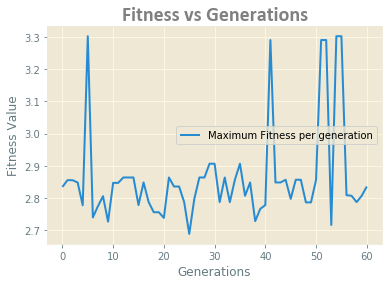

In [13]:
font = {'family':'calibri',
        'color':'grey',
        'weight':'bold',
        'size':20}
plt.plot(max_fitness, label="Maximum Fitness per generation")
plt.legend()
plt.title("Fitness vs Generations", fontdict=font)
plt.xlabel("Generations")
plt.ylabel("Fitness Value")
plt.show()